![Finance Toolkit](https://github.com/JerBouma/FinanceToolkit/assets/46355364/198d47bd-e1b3-492d-acc4-5d9f02d1d009)

The Finance Toolkit is complimented very well with the [Finance Database 🌎](https://github.com/JerBouma/FinanceDatabase), a database that features 300.000+ symbols containing Equities, ETFs, Funds, Indices, Currencies, Cryptocurrencies and Money Markets. By utilising both, it is possible to do a fully-fledged competitive analysis with the tickers found from the FinanceDatabase inputted into the Finance Toolkit.

To install the **FinanceDatabase** it simply requires the following:

```
pip install financedatabase -U
```

From within Python use:

```python
import financedatabase as fd
```

For a detailed explanation of how to use the Finance Database, please see the GitHub page as found [here](https://github.com/JerBouma/FinanceDatabase).

To be able to get started, you need to obtain an API Key from FinancialModelingPrep. This is used to gain access to 30+ years of financial statement both annually and quarterly. Note that the Free plan is limited to 250 requests each day, 5 years of data and only features companies listed on US exchanges.

___ 

<b><div align="center">Obtain an API Key from FinancialModelingPrep <a href="https://intelligence.financialmodelingprep.com/pricing-plans?couponCode=jeroen">here</a>.</div></b>
___

Through the link you are able to subscribe for the free plan and also premium plans at a **15% discount**. This is an affiliate link and thus supports the project at the same time. I have chosen FinancialModelingPrep as a source as I find it to be the most transparent, reliable and at an affordable price. When you notice that data is inaccurate or have any other issue related to the data, note that I simply provide the means to access this data and I am not responsible for the accuracy of the data itself. For this, use [their contact form](https://site.financialmodelingprep.com/contact) or provide the data yourself. 

In [1]:
from financetoolkit import Toolkit
import financedatabase as fd

API_KEY = "FINANCIAL_MODELING_PREP_KEY"

Lets start with searching for companies matching the industry `Road & Rail` in the `United States` that are defined as `Large Cap`.

In [2]:
# Initialize the Equities database
equities = fd.Equities()

# Obtain related companies
road_and_rail = equities.search(
    industry="Road & Rail",
    country="United States",
    market_cap="Large Cap",
    exclude_exchanges=True,
)

# Show the related DataFrame
road_and_rail

,name,summary,currency,sector,industry_group,industry,exchange,market,country,state,city,zipcode,website,market_cap,isin,cusip,figi,composite_figi,shareclass_figi
symbol,,,,,,,,,,,,,,,,,,,
CSX,CSX Corporation,"CSX Corporation, together with its subsidiarie...",USD,Industrials,Transportation,Road & Rail,NMS,NASDAQ Global Select,United States,FL,Jacksonville,32202,http://www.csx.com,Large Cap,US1264081035,126408103,BBG000BGK1N1,BBG000BGJRC8,BBG001S5Q7Q3
KSU,Kansas City Southern,"Kansas City Southern, a transportation holding...",USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,MO,Kansas City,64105,http://www.kcsouthern.com,Large Cap,NaN,NaN,NaN,NaN,NaN
KSU-P,Kansas City Southern,"Kansas City Southern, a transportation holding...",USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,MO,Kansas City,64105,http://www.kcsouthern.com,Large Cap,NaN,NaN,NaN,NaN,NaN
NSC,Norfolk Southern Corporation,"Norfolk Southern Corporation, together with it...",USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,VA,Norfolk,23510-2191,http://www.norfolksouthern.com,Large Cap,US6558441084,655844108,BBG000BQ5GM4,BBG000BQ5DS5,BBG001S5TQJ6
UNP,Union Pacific Corporation,"Union Pacific Corporation, through its subsidi...",USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,NE,Omaha,68179,http://www.up.com,Large Cap,US9078181081,907818108,BBG000BW3413,BBG000BW3299,BBG001S5X2M0
WAB,Westinghouse Air Brake Technologies Corporation,Westinghouse Air Brake Technologies Corporatio...,USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,PA,Pittsburgh,15212,http://www.wabteccorp.com,Large Cap,US9297401088,929740108,BBG000BDDBD5,BBG000BDD940,BBG001S5XBT3


It appears that Kansas City Southern has been merged with Canadian Pacific Railway ([source](https://www.kcsouthern.com/media/news/news-releases/canadian-pacific-and-kansas-city-southern-combination-approved-by-u-s-surface-transportation-board)). Because of this, the ticker is taken out. The reason it still exists in the dataset of the FinanceDatabase is to control for survivorship bias.

In [3]:
road_and_rail = road_and_rail.drop(["KSU", "KSU-P"])

From here on, the tickers from the dataset are used to initialize the Finance Toolkit.

In [4]:
rail_companies = Toolkit(list(road_and_rail.index), api_key=API_KEY)

Let's start by showing the historical prices and plotting them accordingly.

Obtaining historical data: 100%|██████████| 5/5 [00:01<00:00,  2.83it/s]


Open                                  High                       \
              CSX    NSC    UNP    WAB Benchmark    CSX    NSC    UNP    WAB   
Date                                                                           
2013-10-14 8.5867  78.37  78.18  63.87   1699.86 8.6967   79.1 78.765  64.99   
2013-10-15 8.6667  78.95  78.52  64.91   1709.17 8.7267  79.15  78.73  64.95   
2013-10-16 8.7367  79.09 78.575  64.75   1700.49 8.7367  79.97 78.995  64.82   
2013-10-17 8.5733  78.84  78.25  64.83   1720.17 8.5733  78.84  78.37  65.43   
2013-10-18 8.4933  79.01   76.0  65.48   1736.72 8.5833  79.99  76.81  65.83   
...           ...    ...    ...    ...       ...    ...    ...    ...    ...   
2023-10-05  30.84 192.09 202.17 104.22 4259.3101  30.87 192.84 202.42 104.62   
2023-10-06  30.23 189.43 199.83 101.62   4234.79  31.11 193.58 204.21 103.75   
2023-10-09  30.76 191.51 201.46 102.21   4289.02  31.18 196.92 204.66 103.48   
2023-10-10  31.18 197.22 205.02 103.81   4339.75  31.57 201.17 207.04 105.13   
2023-10-11  31.93 201.01 207.24 105.09 4366.5898   32.0  203.4 209.94 105.91   

                      ... Excess Volatility                                 \
           Benchmark  ...               CSX    NSC    UNP    WAB Benchmark   
Date                  ...                                                    
2013-10-14   1711.03  ...            0.0198 0.0195 0.0182 0.0214     0.014   
2013-10-15 1711.5699  ...            0.0198 0.0195 0.0182 0.0214     0.014   
2013-10-16   1721.76  ...            0.0198 0.0195 0.0182 0.0214     0.014   
2013-10-17   1733.45  ...            0.0198 0.0195 0.0182 0.0214     0.014   
2013-10-18 1745.3101  ...            0.0198 0.0195 0.0182 0.0214     0.014   
...              ...  ...               ...    ...    ...    ...       ...   
2023-10-05 4267.1299  ...            0.0198 0.0195 0.0182 0.0214     0.014   
2023-10-06 4324.1001  ...            0.0198 0.0195 0.0182 0.0214     0.014   
2023-10-09   4341.73  ...            0.0198 0.0195 0.0182 0.0214     0.014   
2023-10-10   4385.46  ...            0.0198 0.0195 0.0182 0.0214     0.014   
2023-10-11 4378.6401  ...            0.0198 0.0195 0.0182 0.0214     0.014   

           Cumulative Return                                 
                         CSX    NSC    UNP    WAB Benchmark  
Date                                                         
2013-10-14               1.0    1.0    1.0    1.0       1.0  
2013-10-15            1.0031  0.996  0.994 0.9906    0.9929  
2013-10-16             0.995 1.0108 0.9994 0.9978    1.0067  
2013-10-17             0.975 0.9932 0.9612 1.0063    1.0135  
2013-10-18            0.9877 1.0105 0.9672 1.0134    1.0201  
...                      ...    ...    ...    ...       ...  
2023-10-05            4.1329 3.0064 3.1766 1.6574      2.49  
2023-10-06            4.2009 3.0194 3.2054 1.6709    2.5194  
2023-10-09             4.224 3.0862 3.2345  1.678    2.5353  
2023-10-10            4.2865  3.166  3.267 1.7035    2.5485  
2023-10-11             4.296 3.1847 3.3165 1.7165    2.5594  

[2516 rows x 60 columns]

<Axes: title={'center': 'Cumulative Returns for the Rail Companies'}, xlabel='Date'>

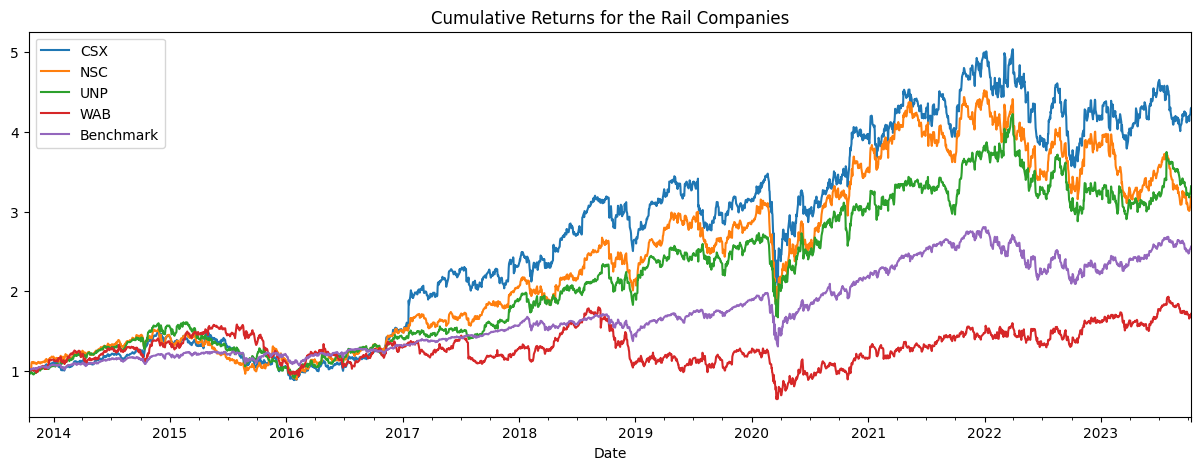

In [5]:
# Collect Historical Data for each ticker
historical_data = rail_companies.get_historical_data()

# Show a portion of the dataset
display(historical_data)

# Plot the Cumulative Returns
historical_data["Cumulative Return"].plot(figsize=(15, 5), title="Cumulative Returns for the Rail Companies")

Let's have a look at the Balance Sheet Statement as well.

In [6]:
# Collect and show the Balance Sheet Statements
rail_companies.get_balance_sheet_statement()

Obtaining balance data: 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]


date                                        1985         1986        1987  \
CSX Cash and Cash Equivalents        187000000.0  315000000.0 921000000.0   
    Short Term Investments                   0.0          0.0         0.0   
    Cash and Short Term Investments  187000000.0  315000000.0 921000000.0   
    Accounts Receivable             1299000000.0 1182000000.0 876000000.0   
    Inventory                        428000000.0  356000000.0 363000000.0   
...                                          ...          ...         ...   
WAB Minority Interest                        NaN          NaN         NaN   
    Total Liabilities and Equity             NaN          NaN         NaN   
    Total Investments                        NaN          NaN         NaN   
    Total Debt                               NaN          NaN         NaN   
    Net Debt                                 NaN          NaN         NaN   

date                                       1988        1989        1990  \
CSX Cash and Cash Equivalents       625000000.0 534000000.0 609000000.0   
    Short Term Investments                  0.0         0.0         0.0   
    Cash and Short Term Investments 625000000.0 534000000.0 609000000.0   
    Accounts Receivable             896000000.0 645000000.0 728000000.0   
    Inventory                       241000000.0 237000000.0 257000000.0   
...                                         ...         ...         ...   
WAB Minority Interest                       NaN         NaN         NaN   
    Total Liabilities and Equity            NaN         NaN         NaN   
    Total Investments                       NaN         NaN         NaN   
    Total Debt                              NaN         NaN         NaN   
    Net Debt                                NaN         NaN         NaN   

date                                       1991        1992        1993  \
CSX Cash and Cash Equivalents       465000000.0 530000000.0 298000000.0   
    Short Term Investments                  0.0         0.0         0.0   
    Cash and Short Term Investments 465000000.0 530000000.0 298000000.0   
    Accounts Receivable             728000000.0 605000000.0 668000000.0   
    Inventory                       206000000.0 189000000.0 199000000.0   
...                                         ...         ...         ...   
WAB Minority Interest                       NaN         NaN         0.0   
    Total Liabilities and Equity            NaN         NaN 175600000.0   
    Total Investments                       NaN         NaN         0.0   
    Total Debt                              NaN         NaN 107900000.0   
    Net Debt                                NaN         NaN 107900000.0   

date                                       1994  ...         2013  \
CSX Cash and Cash Equivalents       265000000.0  ...  592000000.0   
    Short Term Investments          270000000.0  ...  487000000.0   
    Cash and Short Term Investments 535000000.0  ... 1079000000.0   
    Accounts Receivable             706000000.0  ... 1052000000.0   
    Inventory                       211000000.0  ...  252000000.0   
...                                         ...  ...          ...   
WAB Minority Interest                       0.0  ...    1908000.0   
    Total Liabilities and Equity    187700000.0  ... 2821997000.0   
    Total Investments                       0.0  ...          0.0   
    Total Debt                       78100000.0  ...  450709000.0   
    Net Debt                         77100000.0  ...  164949000.0   

date                                        2014         2015         2016  \
CSX Cash and Cash Equivalents        669000000.0  628000000.0  603000000.0   
    Short Term Investments           292000000.0  810000000.0  417000000.0   
    Cash and Short Term Investments  961000000.0 1438000000.0 1020000000.0   
    Accounts Receivable             1129000000.0  982000000.0  938000000.0   
    Inventory                        273000000.0  3500

A very important financial ratio is the "Operating Ratio" for railroad companies. An operating ratio of 80 or lower has generally been seen as good but having a target as low as the mid-70s is even better. From the table below, it is clear that all companies except for WAB (Westinghouse Air Brake Technologies Corporation) are performing very well. This, however, makes sense since WAB is specialized on providing parts instead of actual railroad services.

In [7]:
# Collect and show the Balance Sheet Statements
rail_companies.ratios.get_operating_ratio()

Obtaining cashflow data: 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]

The following data was not provided within the Toolkit class and thus was retrieved from FinancialModelingPrep: Income Statement, Cash Flow Statement.


date,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
CSX,0.8796,0.8366,0.8887,0.8803,0.8878,0.9007,0.9885,0.9695,0.8979,1.5787,...,0.7095,0.7129,0.7049,0.698,0.6711,0.6164,0.5991,0.5896,0.5958,0.6195
NSC,0.812,0.8278,0.9745,0.7881,0.8181,0.825,0.9748,0.8076,0.8071,0.8971,...,0.7104,0.6924,0.7256,0.6891,0.6601,0.6545,0.6469,0.654,0.6009,0.6227
UNP,0.8453,0.6641,0.6125,0.7541,0.7754,0.7701,0.7661,0.7764,0.8162,0.7894,...,0.661,0.6351,0.6309,0.6353,0.6205,0.627,0.606,0.5989,0.5717,0.6013
WAB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7816,0.7433,...,0.8296,0.8269,0.8163,0.8436,0.8915,0.8915,0.9191,0.9015,0.888,0.8791


Other than this ratio, important other metrics are revenue growth, strong profit margins and efficient capital management. These can be explored further by looking into the income statement, the profit margin ratio and the current ratio.

In [8]:
# Obtain the income statement and select the revenues
revenues = rail_companies.get_income_statement().loc[:, "Revenue", :]

# Show revenue absolute numbers for each company
display(revenues)

# Show the revenue growth for each company
rail_companies.get_income_statement(growth=True).loc[:, "Revenue", :]

date,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
CSX,7320000000.0,6345000000.0,8043000000.0,7592000000.0,7745000000.0,8205000000.0,8636000000.0,8734000000.0,8940000000.0,9608000000.0,...,12026000000.0,12669000000.0,11811000000.0,11069000000.0,11408000000.0,12250000000.0,11937000000.0,10583000000.0,12522000000.0,14853000000.0
NSC,3825100000.0,4076400000.0,4112800000.0,4461600000.0,4536000000.0,4617000000.0,4451300000.0,4606600000.0,4460100000.0,4581300000.0,...,11245000000.0,11624000000.0,10511000000.0,9888000000.0,10551000000.0,11458000000.0,11296000000.0,9789000000.0,11142000000.0,12745000000.0
UNP,7798000000.0,6574000000.0,5943000000.0,6068000000.0,6492000000.0,6964000000.0,7029000000.0,7294000000.0,7561000000.0,7798000000.0,...,21963000000.0,23988000000.0,21813000000.0,19941000000.0,21240000000.0,22832000000.0,21708000000.0,19533000000.0,21804000000.0,24875000000.0
WAB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285300000.0,347500000.0,...,2566392000.0,3044454000.0,3307998000.0,2931188000.0,3881756000.0,4363547000.0,8200000000.0,7556100000.0,7822000000.0,8362000000.0


date,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
CSX,NaN,-0.1332,0.2676,-0.0561,0.0202,0.0594,0.0525,0.0113,0.0236,0.0747,...,0.023,0.0535,-0.0677,-0.0628,0.0306,0.0738,-0.0256,-0.1134,0.1832,0.1862
NSC,NaN,0.0657,0.0089,0.0848,0.0167,0.0179,-0.0359,0.0349,-0.0318,0.0272,...,0.0186,0.0337,-0.0958,-0.0593,0.0671,0.086,-0.0141,-0.1334,0.1382,0.1439
UNP,NaN,-0.157,-0.096,0.021,0.0699,0.0727,0.0093,0.0377,0.0366,0.0313,...,0.0496,0.0922,-0.0907,-0.0858,0.0651,0.075,-0.0492,-0.1002,0.1163,0.1408
WAB,NaN,-0.0466,-0.0098,0.0602,-0.0593,-0.0524,0.0289,-0.0123,-0.6502,0.218,...,0.0733,0.1863,0.0866,-0.1139,0.3243,0.1241,0.8792,-0.0785,0.0352,0.069


Profit Margins can be looked at from a variety of perspectives. The Finance Toolkit features Gross, Operating, Net Profit and EBT Profit Margins. With the `collect_profitability_ratios` functions within the `ratios` module these can be collected for each company accompanied with many other useful ratios. To provide an appropriate overview, the profitability ratios are only shown for `CSX`.

In [9]:
# Collect the profitability ratios and select the ratios for CSX
rail_companies.ratios.collect_profitability_ratios().loc["CSX"]

date,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Gross Margin,0.1762,0.2177,0.1789,0.1812,0.1699,0.157,0.0695,0.0908,0.1661,0.41,...,0.2888,0.2852,0.3034,0.3062,0.3307,0.3896,0.4083,0.4122,0.4105,0.3895
Operating Margin,0.1204,0.1634,0.1113,0.1197,0.1122,0.0993,0.0115,0.0305,0.1021,0.1282,...,0.2888,0.2852,0.3034,0.3062,0.3214,0.3975,0.4159,0.4122,0.4467,0.4055
Net Profit Margin,-0.0161,0.0659,0.0537,-0.0043,0.0554,0.0444,-0.0088,0.0023,0.0402,0.0679,...,0.155,0.1521,0.1666,0.1548,0.4796,0.2701,0.279,0.2613,0.3019,0.2805
Interest Coverage Ratio,inf,inf,inf,inf,inf,inf,-inf,-inf,inf,inf,...,8.1441,8.7413,8.8088,8.1002,9.1245,9.7027,8.6866,7.6446,9.1953,9.9973
Income Before Tax Profit Margin,-0.0359,0.1149,0.0848,-0.0079,0.0893,0.0654,-0.0131,-0.0008,0.0708,0.1047,...,0.243,0.2403,0.2657,0.2476,0.2754,0.3513,0.3616,0.3427,0.3954,0.3645
Effective Tax Rate,0.5513,0.4266,0.3666,0.3667,0.3829,0.3203,0.3274,3.8571,0.4329,0.3519,...,0.3621,0.367,0.3728,0.3747,-0.7412,0.2312,0.2282,0.2377,0.2363,0.2305
Return on Assets (ROA),NaN,0.0346,0.0334,-0.0025,0.0339,0.029,-0.0059,0.0015,0.0271,0.048,...,0.0598,0.0594,0.0578,0.0487,0.1538,0.0913,0.0888,0.0709,0.0941,0.1011
Return on Equity (ROE),NaN,0.0883,0.0888,-0.0081,0.1292,0.1049,-0.0226,0.0065,0.1167,0.1887,...,0.1911,0.1778,0.1723,0.1467,0.4142,0.2424,0.2726,0.2214,0.2842,0.3189
Return on Invested Capital (ROIC),NaN,NaN,NaN,NaN,0.0504,0.0514,0.0069,-0.0789,0.0454,0.0804,...,0.0808,0.079,0.0769,0.066,0.4346,0.1159,0.114,0.0938,0.1182,0.1276
Return on Capital Employed (ROCE),-0.0276,0.0674,0.0602,-0.0055,0.0696,0.051,-0.0109,-0.0007,0.0568,0.0897,...,0.1187,0.116,0.1113,0.0995,0.109,0.142,0.1399,0.116,0.1481,0.1561


Capital Management can be viewed from multiple angles including liquidity, accounts receivable, inventory and accounts payable management. These lead to the Operating and Cash Conversion Cycles. All of these ratios can be found within the `collect_efficiency_ratios` and `collect_liquidity_ratios` functions within the `ratios` module.

In [10]:
# Collect the liquidity ratios for all companies
rail_companies.ratios.collect_liquidity_ratios()

date                                          1985         1986         1987  \
CSX Current Ratio                           1.0502       1.1375       1.2592   
    Quick Ratio                             0.7613       0.8105       0.9468   
    Cash Ratio                              0.0958       0.1705       0.4852   
    Working Capital                     98000000.0  254000000.0  492000000.0   
    Operating Cash Flow Ratio                  NaN          NaN          NaN   
    Operating Cash Flow to Sales Ratio         NaN          NaN          NaN   
    Short Term Coverage Ratio                  NaN          NaN          NaN   
NSC Current Ratio                           1.4349       1.6452       1.5654   
    Quick Ratio                             1.2999         1.44       1.3928   
    Cash Ratio                              0.7525       0.6868       0.6602   
    Working Capital                    622600000.0  679900000.0  685000000.0   
    Operating Cash Flow Ratio                  NaN          NaN          NaN   
    Operating Cash Flow to Sales Ratio         NaN          NaN          NaN   
    Short Term Coverage Ratio                  NaN          NaN          NaN   
UNP Current Ratio                           1.0537       0.8666        0.892   
    Quick Ratio                             0.7221       0.5209       0.5629   
    Cash Ratio                              0.2701       0.1675       0.1054   
    Working Capital                     90000000.0 -239000000.0 -169000000.0   
    Operating Cash Flow Ratio                  NaN          NaN          NaN   
    Operating Cash Flow to Sales Ratio         NaN          NaN          NaN   
    Short Term Coverage Ratio                  NaN          NaN          NaN   
WAB Current Ratio                              NaN          NaN          NaN   
    Quick Ratio                                NaN          NaN          NaN   
    Cash Ratio                                 NaN          NaN          NaN   
    Working Capital                            NaN          NaN          NaN   
    Operating Cash Flow Ratio                  NaN          NaN          NaN   
    Operating Cash Flow to Sales Ratio         NaN          NaN          NaN   
    Short Term Coverage Ratio                  NaN          NaN          NaN   

date                                           1988         1989         1990  \
CSX Current Ratio                            0.7955        0.734        0.749   
    Quick Ratio                              0.4969       0.5058       0.5805   
    Cash Ratio                               0.2042       0.2291       0.2644   
    Working Capital                    -626000000.0 -620000000.0 -578000000.0   
    Operating Cash Flow Ratio                   NaN        0.432        0.386   
    Operating Cash Flow to Sales Ratio          NaN         0.13       0.1083   
    Short Term Coverage Ratio                   NaN      -1.0223      -0.9251   
NSC Current Ratio                            1.5522       1.4167       1.2734   
    Quick Ratio                              1.3423       0.9149       0.9057   
    Cash Ratio                               0.5337       0.1792       0.2841   
    Working Capital                     659700000.0  502900000.0  375000000.0   
    Operating Cash Flow Ratio                   NaN       0.9175       0.7251   
    Operating Cash Flow to Sales Ratio          NaN       0.2441       0.2154   
    Short Term Coverage Ratio                   NaN       8.3248       7.0099   
UNP Current Ratio                            0.8962       0.6718       0.6918   
    Quick Ratio                              0.6188       0.3549       0.3936   
    Cash Ratio                                0.236       0.1001       0.0932   
    Working Capital                    -193000000.0 -613000000.0 -559000000.0   
    Operating Cash Flow Ratio                   NaN       0.7939       0.8087   
    Operating Cash Flow to Sales Ratio          NaN       0

In [11]:
# Collect the efficiency ratios for all companies
rail_companies.ratios.collect_efficiency_ratios()

date                                             1985     1986     1987  \
CSX Days of Inventory Outstanding (DIO)           NaN  28.8235  19.8694   
    Days of Sales Outstanding (DSO)               NaN  71.3605  46.6971   
    Operating Cycle (CC)                          NaN  100.184  66.5665   
    Days of Accounts Payable Outstanding (DPO)    NaN      0.0      0.0   
    Cash Conversion Cycle (CCC)                   NaN  100.184  66.5665   
    Receivables Turnover                          NaN   0.1955   0.1279   
    Inventory Turnover Ratio                      NaN  12.6633    18.37   
    Accounts Payable Turnover Ratio               NaN      inf      inf   
    SGA-to-Revenue Ratio                          0.0      0.0      0.0   
    Fixed Asset Turnover                          NaN   0.6344   0.7516   
    Asset Turnover Ratio                          NaN   0.5254   0.6213   
    Operating Ratio                            0.8796   0.8366   0.8887   
NSC Days of Inventory Outstanding (DIO)           NaN   8.9085   7.5613   
    Days of Sales Outstanding (DSO)               NaN    70.62  74.6099   
    Operating Cycle (CC)                          NaN  79.5286  82.1712   
    Days of Accounts Payable Outstanding (DPO)    NaN      0.0      0.0   
    Cash Conversion Cycle (CCC)                   NaN  79.5286  82.1712   
    Receivables Turnover                          NaN   0.1935   0.2044   
    Inventory Turnover Ratio                      NaN  40.9719  48.2721   
    Accounts Payable Turnover Ratio               NaN      inf      inf   
    SGA-to-Revenue Ratio                       0.0909    0.096   0.2368   
    Fixed Asset Turnover                          NaN   0.5182   0.5167   
    Asset Turnover Ratio                          NaN   0.4176   0.4208   
    Operating Ratio                             0.812   0.8278   0.9745   
UNP Days of Inventory Outstanding (DIO)           NaN  63.2017  89.3085   
    Days of Sales Outstanding (DSO)               NaN  38.6154  41.4256   
    Operating Cycle (CC)                          NaN 101.8171 130.7341   
    Days of Accounts Payable Outstanding (DPO)    NaN      0.0      0.0   
    Cash Conversion Cycle (CCC)                   NaN 101.8171 130.7341   
    Receivables Turnover                          NaN   0.1058   0.1135   
    Inventory Turnover Ratio                      NaN   5.7752    4.087   
    Accounts Payable Turnover Ratio               NaN      inf      inf   
    SGA-to-Revenue Ratio                       0.2887   0.2711   0.3648   
    Fixed Asset Turnover                          NaN   0.7203   0.6311   
    Asset Turnover Ratio                          NaN   0.6095   0.5457   
    Operating Ratio                            0.8453   0.6641   0.6125   
WAB Days of Inventory Outstanding (DIO)           NaN      NaN      NaN   
    Days of Sales Outstanding (DSO)               NaN      NaN      NaN   
    Operating Cycle (CC)                          NaN      NaN      NaN   
    Days of Accounts Payable Outstanding (DPO)    NaN      NaN      NaN   
    Cash Conversion Cycle (CCC)                   NaN      NaN      NaN   
    Receivables Turnover                          NaN      NaN      NaN   
    Inventory Turnover Ratio                      NaN      NaN      NaN   
    Accounts Payable Turnover Ratio               NaN      NaN      NaN   
    SGA-to-Revenue Ratio                          NaN      NaN      NaN   
    Fixed Asset Turnover                          NaN      NaN      NaN   
    Asset Turnover Ratio                          NaN      NaN      NaN   
    Operating Ratio                               NaN      NaN      NaN   

date                                              1988    1989     1990  \
CSX Days of Inventory Outstanding (DIO)        17.7333  13.569  13.0338   
    Days of Sales Outstanding (DSO)            42.5962 36.3115   30.539   
    Operating Cycle (CC)                       60.3294 49.8805  43.5728   
    Days of Accounts Pay